In [1]:
import keras
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

TICKER_DIR = "C:\\Users\\anton\\Documents\\antoniouaa\\msc_thesis\\data\\tickers\\ticker_data\\_Rolling"

df = pd.read_csv(f"{TICKER_DIR}\\MA_AIZP.csv", header=0)
# dataset = df.tail(160).iloc[:, :].values

sc = MinMaxScaler()
scaled_dataset = sc.fit_transform(df)

target = df["close"].tail(180)
dataset = df[["high", "low", "open"]].tail(180)
# dataset.values

Using TensorFlow backend.


In [2]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		end_ix = i + n_steps
		if end_ix > len(sequences):
			break
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix-1, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 3

open = dataset["open"].values.reshape(len(dataset), 1)
high = dataset["high"].values.reshape(len(dataset), 1)
low = dataset["low"].values.reshape(len(dataset), 1)
close = target.values.reshape(len(dataset), 1)
d = np.hstack((open, high, low, close))
X, y = split_sequences(d, n_steps)

n_features = X.shape[2] # 3
print(d.shape)
print(X.shape)
print(y.shape)

(180, 4)
(178, 3, 4)
(178, 4)


In [23]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(100, activation="relu", return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation="relu"))
model.add(Dense(n_features))
model.compile(optimizer="adam", loss="mse", metrics=["accuracy", "mae"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

model.fit(X_train, y_train, epochs=400, verbose=1)

accuracy: 0.6901 - mae: 0.8201
Epoch 234/400
142/142 [==============================] - 0s 169us/step - loss: 1.1857 - accuracy: 0.6901 - mae: 0.8335
Epoch 235/400
142/142 [==============================] - 0s 169us/step - loss: 1.2075 - accuracy: 0.6901 - mae: 0.8275
Epoch 236/400
142/142 [==============================] - 0s 169us/step - loss: 1.1519 - accuracy: 0.6901 - mae: 0.8263
Epoch 237/400
142/142 [==============================] - 0s 162us/step - loss: 1.1725 - accuracy: 0.6901 - mae: 0.8210
Epoch 238/400
142/142 [==============================] - 0s 166us/step - loss: 1.1344 - accuracy: 0.6901 - mae: 0.8034
Epoch 239/400
142/142 [==============================] - 0s 151us/step - loss: 1.2025 - accuracy: 0.6901 - mae: 0.8335
Epoch 240/400
142/142 [==============================] - 0s 158us/step - loss: 1.3122 - accuracy: 0.6901 - mae: 0.8787
Epoch 241/400
142/142 [==============================] - 0s 166us/step - loss: 1.4388 - accuracy: 0.6690 - mae: 0.9509
Epoch 242/400
142

In [24]:
x_in = np.array([[108.2,	108.4,	107.8,	107.9,
107.71,	107.8371,	107.71,	107.8371,
107.71,	107.71,	107.7,	107.7
]])
x_in = x_in.reshape((1, n_steps, n_features))
yhat = model.predict(x_in, verbose=1)
yhat

1/1 [==============================] - 0s 85ms/step


array([[107.32912 , 108.083534, 107.078415, 107.63711 ]], dtype=float32)

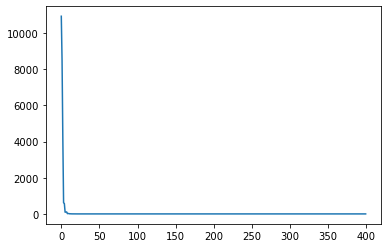

In [25]:
model.history.history.keys()
plt.plot(model.history.history["loss"])

In [26]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(*[f"History Item [{item}] reports value of {value}" for value, item in zip(scores, model.metrics_names)], sep="\n")

History Item [loss] reports value of 1.8945788939793904
History Item [accuracy] reports value of 0.5555555820465088
History Item [mae] reports value of 1.0775936841964722


In [28]:
actual = df["close"].tail(36).values
predicted = np.array([])
yhat = model.predict(X_test, verbose=0)
predictions = yhat[:, -1]

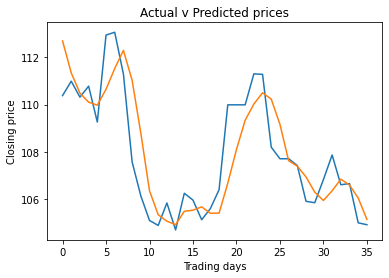

In [30]:
fig = plt.figure()
plt.title("Actual v Predicted prices")
plt.ylabel("Closing price")
plt.xlabel("Trading days")
plt.plot(actual)
plt.plot(predictions)
plt.savefig("C:\\Users\\anton\\Documents\\antoniouaa\\msc_thesis\\data\\tickers\\AIZP.png")